# Import libraries

In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from scipy.stats import iqr
from functools import partial, reduce
from sqlalchemy import create_engine
import datetime
import warnings
from sqlite3 import connect


# Read the data from Social Development Bank
and delete the months from the year 2021

In [399]:
df = pd.read_excel (r'C:\Users\mms-1\Desktop\جواهر\rased\BankData.xlsx')
df.drop(df[df['date_of_payment'] == '2021/01' ].index, inplace = True)
df.drop(df[df['date_of_payment'] == '2021/02' ].index, inplace = True)
df.drop(df[df['date_of_payment'] == '2020/13' ].index, inplace = True)
df['date_of_payment'] = df['date_of_payment'].astype(str).astype(int)

# My data contains : 142549 Rows and 14 Features

In [400]:
df.head()

,City,category,service_or_product,sector,amount_of_funding,amount_of_payment,date_of_payment,gender,age,social_status,special_needs,family_members,program_zood,income
0,Jizan,business_funding,startups,NaN,90000.0,< 1000,6,male,< 30,unmarried,no,< 02,no,< 5000
1,Ha'il,personal_funding,marriage,government_employee,60000.0,>= 1000,2,male,>= 30,married,no,>= 02,no,>= 7500
2,Taif,personal_funding,marriage,NaN,42000.0,< 1000,3,male,>= 30,married,no,>= 10,no,< 5000
3,Madina,personal_funding,marriage,NaN,42000.0,< 1000,3,male,< 30,married,no,>= 02,yes,< 5000
4,Taif,personal_funding,marriage,NaN,42000.0,< 1000,1,male,< 30,married,no,>= 02,no,< 5000


In [401]:
df.shape

(142549, 14)

# Check for nulls values

In [402]:
df.isna().sum()

City                      0
category                  0
service_or_product        0
sector                74456
amount_of_funding         0
amount_of_payment         0
date_of_payment           0
gender                    0
age                      52
social_status            49
special_needs             0
family_members            0
program_zood              0
income                    0
dtype: int64

# Remove empty values 

we kept the empty values of the column sector because 74456 is important 

In [403]:
df.dropna(subset=[ 'age','social_status'], inplace=True)

In [404]:
df.shape

(142497, 14)

# Determinig the financing requests for marriage 
to study the awareness of citizens in term of managing marriage costs for the year 2020.

In [405]:
a= df[df['service_or_product']== "marriage" ]

In [406]:
a.describe()

,amount_of_funding,date_of_payment
count,34753.000000,34753.000000
mean,55741.802869,8.122522
std,9642.359438,3.495172
min,18000.000000,1.000000
25%,60000.000000,6.000000
50%,60000.000000,9.000000
75%,60000.000000,11.000000
max,60000.000000,12.000000


In [407]:
a.shape

(34753, 14)

# Add a column for funding levels 

In [408]:
    level = []
    for row in a['amount_of_funding']:
        if row >= 50000 :    level.append('Level_5')
        elif row >= 40000:   level.append('Level_4')
        elif row >= 30000:  level.append('Level_3')
        elif row >= 20000:  level.append('Level_2')
        
        else:           level.append('Level_1')


In [409]:
a['level'] = level


<ipython-input-409-0c124757e0b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['level'] = level


Modify the terms of age

In [410]:
a.replace(">= 31", 
           ">= 30", 
           inplace=True)
a.replace("< 30", 
           "< 31", 
           inplace=True)


C:\Users\mms-1\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [411]:
a.head()

,City,category,service_or_product,sector,amount_of_funding,amount_of_payment,date_of_payment,gender,age,social_status,special_needs,family_members,program_zood,income,level
1,Ha'il,personal_funding,marriage,government_employee,60000.0,>= 1000,2,male,>= 30,married,no,>= 02,no,>= 7500,Level_5
2,Taif,personal_funding,marriage,NaN,42000.0,< 1000,3,male,>= 30,married,no,>= 10,no,< 5000,Level_4
3,Madina,personal_funding,marriage,NaN,42000.0,< 1000,3,male,< 31,married,no,>= 02,yes,< 5000,Level_4
4,Taif,personal_funding,marriage,NaN,42000.0,< 1000,1,male,< 31,married,no,>= 02,no,< 5000,Level_4
5,Madina,personal_funding,marriage,NaN,42000.0,< 1000,3,male,< 31,married,no,>= 02,yes,>= 5000,Level_4


In [412]:
a.shape

(34753, 15)

# View the financing ratios for marriage
based on the level of funding :
 Level 5 50000-60000
 level 4 40000-49999
 level 3 30000-39999
 level 2 20000-29999
 level 1 is less than 20000 ,

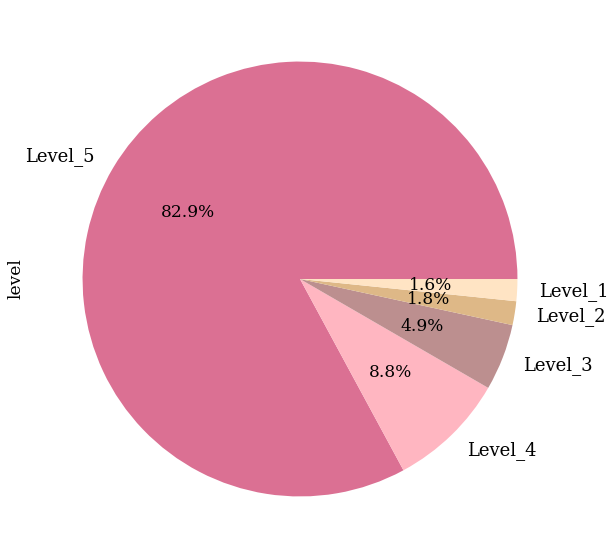

In [413]:
colors=['#DB7093','#FFB6C1', '#BC8F8F', '#DEB887', '#FFE4C4']
plt.rcParams['font.size'] = 17
plt.rcParams["font.family"] = "serif"
c= a.level.value_counts()
c.plot(kind='pie', colors=colors ,autopct='%1.1f%%', figsize=(25, 10));

# Cities with the highest financing for marriage

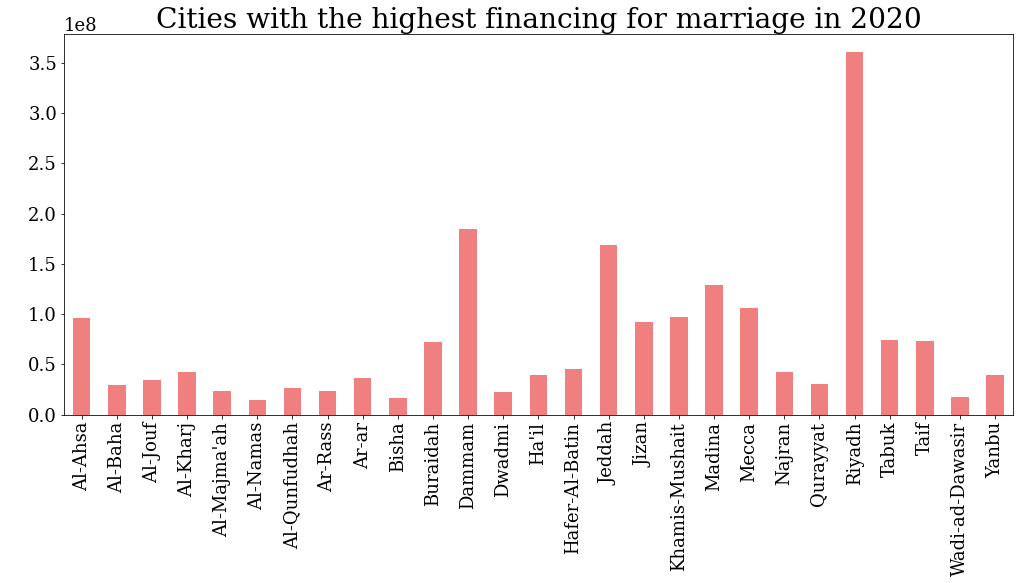

In [414]:
dfg1 = a.groupby('City').amount_of_funding.sum()
plt.rc('xtick', labelsize=18,color ="#000000") 
plt.rc('ytick', labelsize=18,color ="#000000") 
plt.rcParams["font.family"] = "serif"
plt.title('Cities with the highest financing for marriage in 2020',fontsize = 28,color ="#000000")
dfg1.plot(kind='bar', ylabel=' ',
         xlabel='',figsize=(17, 7),color = "#F08080");

# The months for the year 2020 with marriage financing

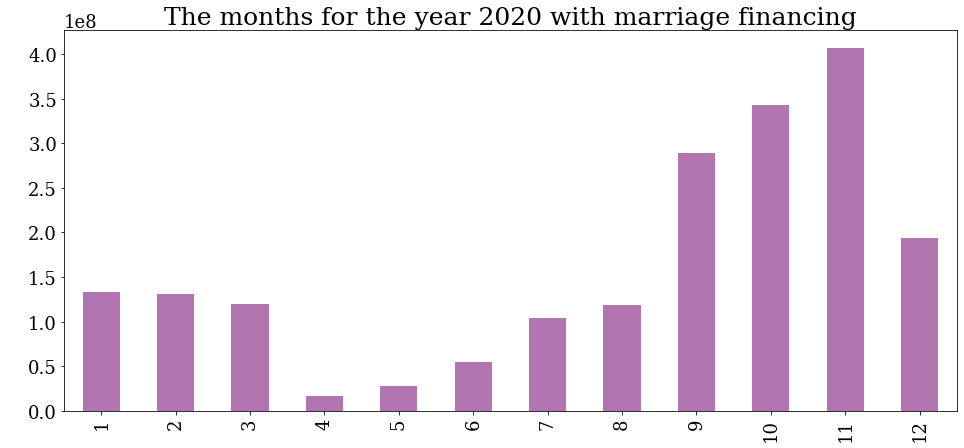

In [415]:
dfg2 = a.groupby('date_of_payment').amount_of_funding.sum()
plt.rc('xtick', labelsize=18,color ="#000000") 
plt.rc('ytick', labelsize=18,color ="#000000") 
plt.rcParams["font.family"] = "serif"
plt.title('The months for the year 2020 with marriage financing',fontsize = 25,color ="#000000")
dfg2.plot(kind='bar',  ylabel=' ',
         xlabel='', figsize=(16, 7),color = (0.5,0.1,0.5,0.6));


 The Social Development Bank provides marriage financing to men only 

In [416]:
a.gender.value_counts()

male    34753
Name: gender, dtype: int64

# Calculating the age ratio 
to citizens requesting marriage financing 


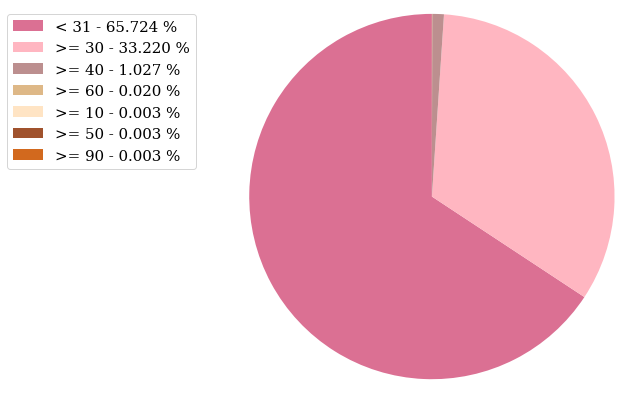

In [417]:
b= a.age.value_counts()
b1=b.index
colors=['#DB7093','#FFB6C1', '#BC8F8F', '#DEB887', '#FFE4C4',"#A0522D","#D2691E","#CD853F","#F4A460"]
porcent = 100.*b/b.sum()
plt.rcParams["figure.figsize"] = (100,7)
patches, texts = plt.pie(b, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.3f} %'.format(i,j) for i,j in zip(b1, porcent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, b),
                                          key=lambda b1: b1[2],
                                          reverse=True))
plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
           fontsize=15);

# Calculating the ages of Citizens in relation to the level of funding

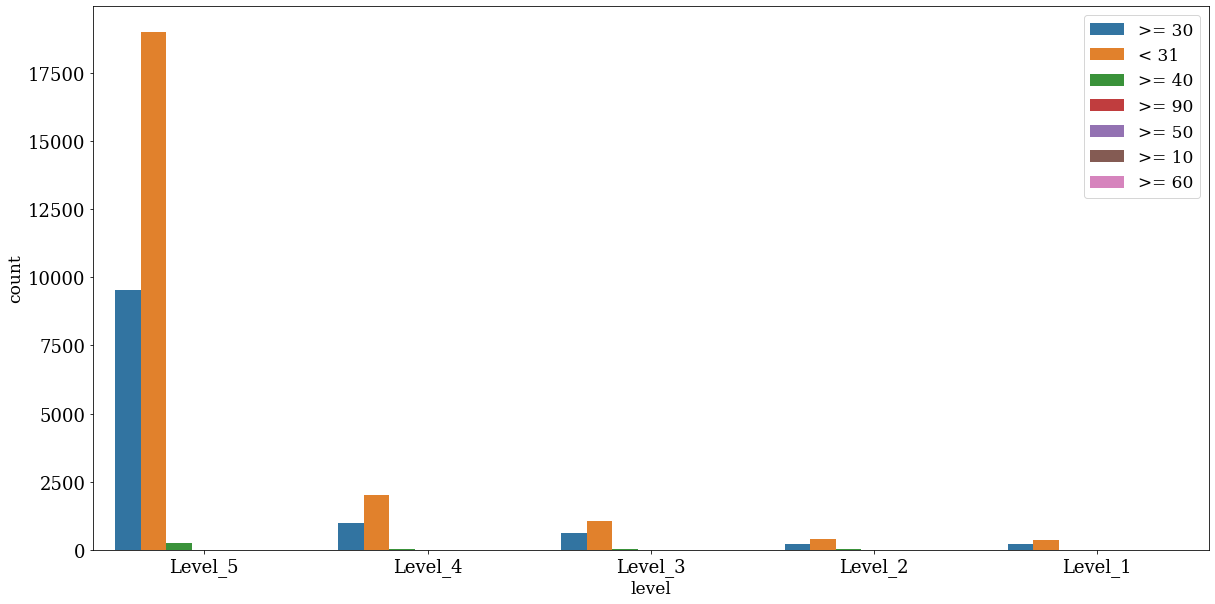

In [418]:
plt.rcParams["figure.figsize"] = (20,10)

ax = sns.countplot(x="level", hue="age", data=a )
ax.legend(loc=1);

# Calculating the percentage of people with special needs 
it's 1021 from 33732

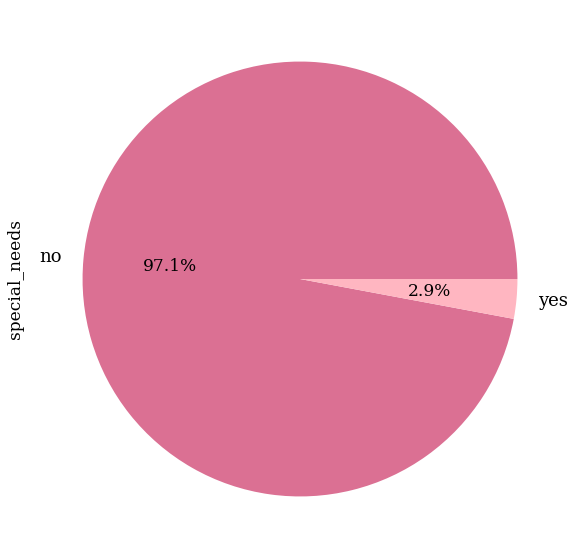

In [419]:
colors=['#DB7093','#FFB6C1', '#BC8F8F', '#DEB887', '#FFE4C4']
plt.rcParams['font.size'] = 17
plt.rcParams["font.family"] = "serif"
d= a.special_needs.value_counts()
d.plot(kind='pie', colors=colors ,autopct='%1.1f%%', figsize=(25, 10));

# View the financing ratios for marriage
For people with special needs 

We will notic that the percentages are similar to the percentage of all citizens 

In [420]:
a1= a[a['special_needs']== "yes" ]

In [421]:
a1.level.value_counts()

Level_5    818
Level_4     94
Level_3     72
Level_2     22
Level_1     15
Name: level, dtype: int64

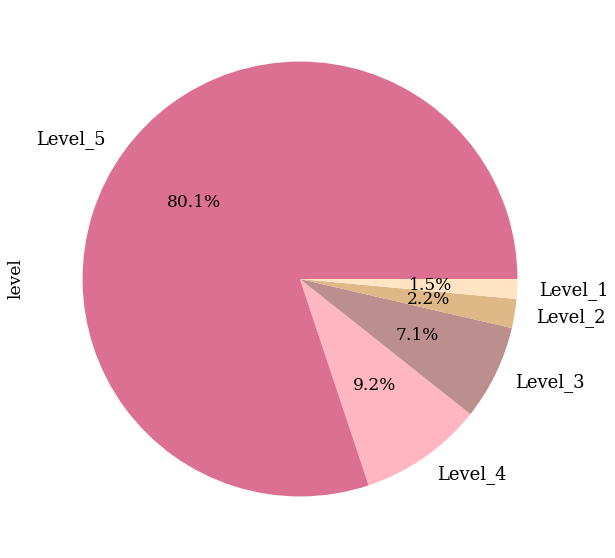

In [422]:
colors=['#DB7093','#FFB6C1', '#BC8F8F', '#DEB887', '#FFE4C4']
plt.rcParams['font.size'] = 17
plt.rcParams["font.family"] = "serif"
d1= a1.level.value_counts()
d1.plot(kind='pie', colors=colors ,autopct='%1.1f%%', figsize=(25, 10));

# Calculating the age ratio
to Special needs requesting marriage financing 

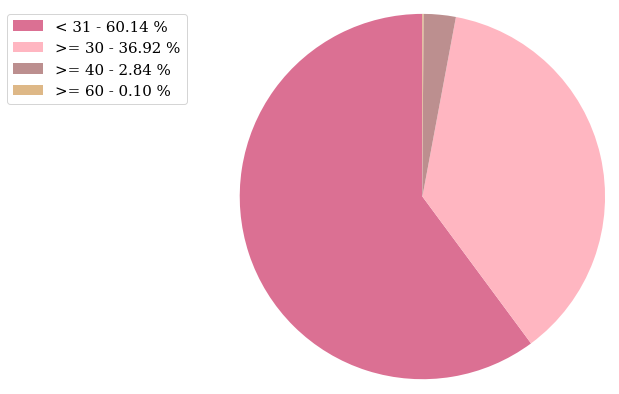

In [423]:
b= a1.age.value_counts()
b1=b.index
colors=['#DB7093','#FFB6C1', '#BC8F8F', '#DEB887', '#FFE4C4',"#A0522D","#D2691E","#CD853F","#F4A460"]
porcent = 100.*b/b.sum()
plt.rcParams["figure.figsize"] = (100,7)
patches, texts = plt.pie(b, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(b1, porcent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, b),
                                          key=lambda b1: b1[2],
                                          reverse=True))
plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
           fontsize=15);